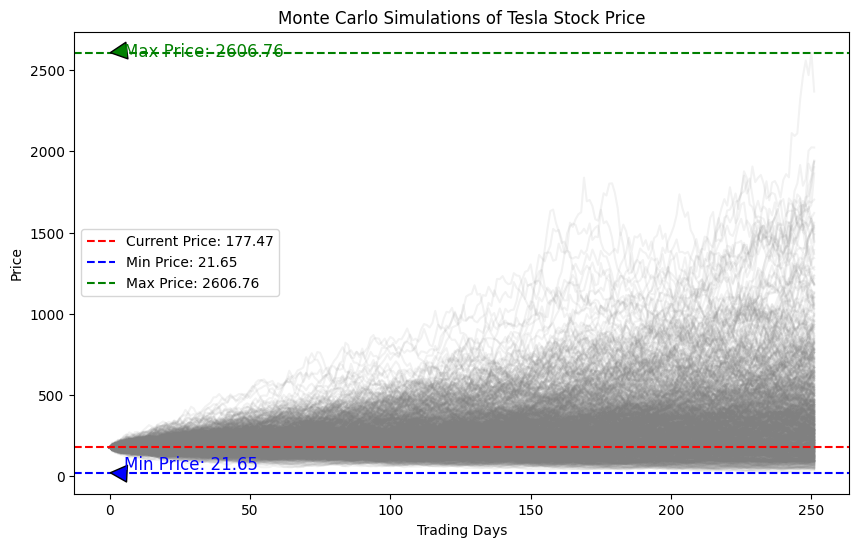

(377.56189595038364, 288.46035601485505, 174.06810817115, 465.8587971795412)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the current price of Tesla stock
current_price = 177.47 # flag : 2024.06.07 

# Using hypothetical parameters for mu and sigma
mu = 0.001930208246601437  # Mean of the daily log returns (2020-01-01'~'2023-01-01')
sigma = 0.04548840683067675  # Standard deviation of the daily log returns (2020-01-01'~'2023-01-01')

# Monte Carlo simulation parameters
num_simulations = 1000
time_horizon = 252  # Number of trading days in a year

# Simulation with the current price
simulations = np.zeros((num_simulations, time_horizon))

for i in range(num_simulations):
    prices = [current_price]
    for t in range(1, time_horizon):
        # Samples a random value from a normal distribution with the mean (mu) and standard deviation (sigma) of the daily log returns.
        shock = np.random.normal(mu, sigma) 
        # Calculates the new price by applying the exponential of the shock to the last price in the list.
        price = prices[-1] * np.exp(shock)
        # Appends the new price to the list of prices.
        prices.append(price)
    simulations[i, :] = prices

# Summary of simulation outcomes
final_prices = simulations[:, -1]
mean_final_price = np.mean(final_prices)
median_final_price = np.median(final_prices)
percentile_25 = np.percentile(final_prices, 25)
percentile_75 = np.percentile(final_prices, 75)

# Plot simulations
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color='grey', alpha=0.1)
plt.axhline(y=current_price, color='red', linestyle='--', label=f'Current Price: {current_price}')
plt.title('Monte Carlo Simulations of Tesla Stock Price')
plt.xlabel('Trading Days')
plt.ylabel('Price')
plt.legend()

# Display min and max prices
min_price = simulations.min()
max_price = simulations.max()
plt.axhline(y=min_price, color='blue', linestyle='--', label=f'Min Price: {min_price:.2f}')
plt.axhline(y=max_price, color='green', linestyle='--', label=f'Max Price: {max_price:.2f}')
plt.legend()

# Annotate the min and max prices
plt.annotate(f'Min Price: {min_price:.2f}', xy=(0, min_price), xytext=(5, min_price + 20),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'Max Price: {max_price:.2f}', xy=(0, max_price), xytext=(5, max_price - 20),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, color='green')

plt.show()

mean_final_price, median_final_price, percentile_25, percentile_75
